In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [122]:
#Import the data
df = pd.read_csv('../data/AviationData_cleaned.csv')
state_codes = pd.read_csv('../data/USState_Codes.csv')

c:\Users\nateh\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (20,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21065 entries, 0 to 21064
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.ID                21065 non-null  object 
 1   Investigation.Type      21065 non-null  object 
 2   Accident.Number         21065 non-null  object 
 3   Event.Date              21065 non-null  object 
 4   Year                    21065 non-null  int64  
 5   Location                21065 non-null  object 
 6   State.Code              21065 non-null  object 
 7   State.Name              21065 non-null  object 
 8   Region                  21065 non-null  object 
 9   Latitude                17904 non-null  object 
 10  Longitude               17897 non-null  object 
 11  Airport.Code            14795 non-null  object 
 12  Airport.Name            15202 non-null  object 
 13  Injury.Severity         20991 non-null  object 
 14  Num.Fatalities          21065 non-null

# Purpose of Flight

c:\Users\nateh\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


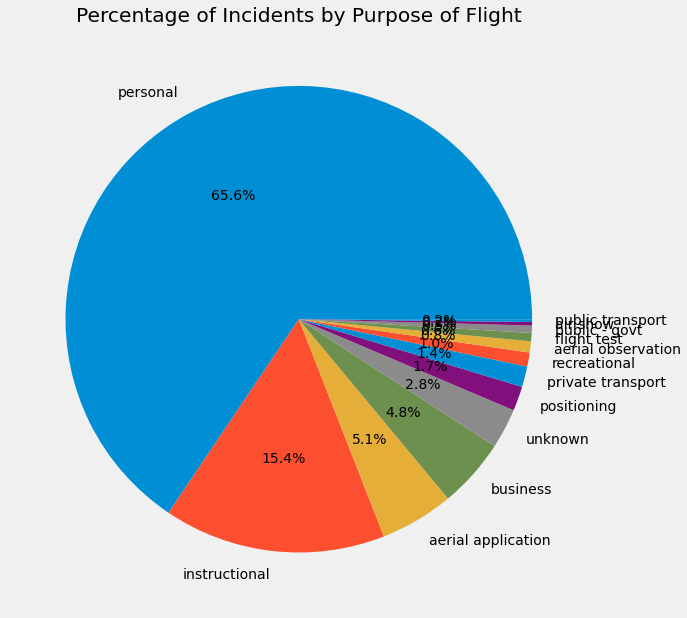

In [124]:
df['Purpose.Binned'].value_counts(normalize=True).plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')
ax = plt.title('Percentage of Incidents by Purpose of Flight')
ax = plt.ylabel('')



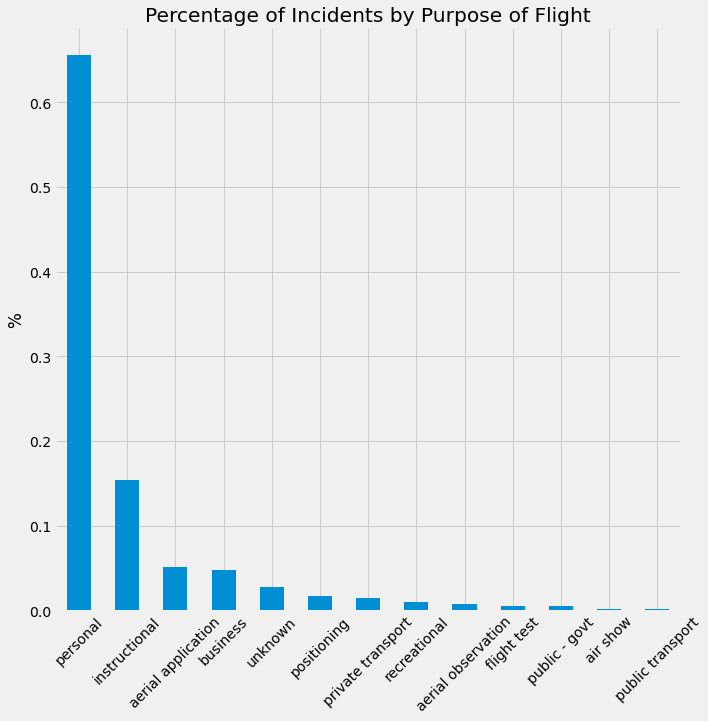

In [125]:
ax = df['Purpose.Binned'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 10))
plt.title('Percentage of Incidents by Purpose of Flight')
plt.ylabel('%')
plt.xticks(rotation=45);



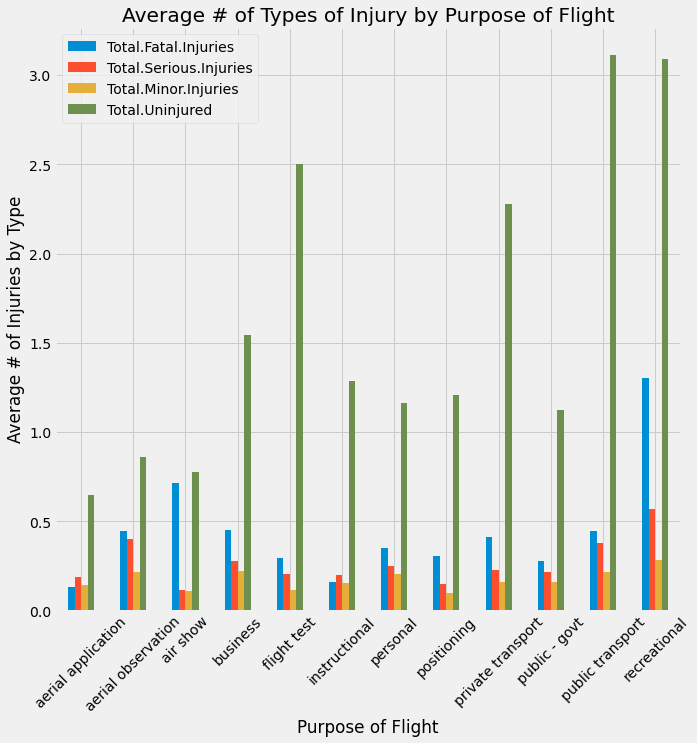

In [126]:
injury_df = df.groupby('Purpose.Binned').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'])

#Dropping unknown from the 'purpose_binned' column of injury_df
injury_df.drop('unknown').plot(kind='bar', figsize=(10, 10))
plt.title('Average # of Types of Injury by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Average # of Injuries by Type');

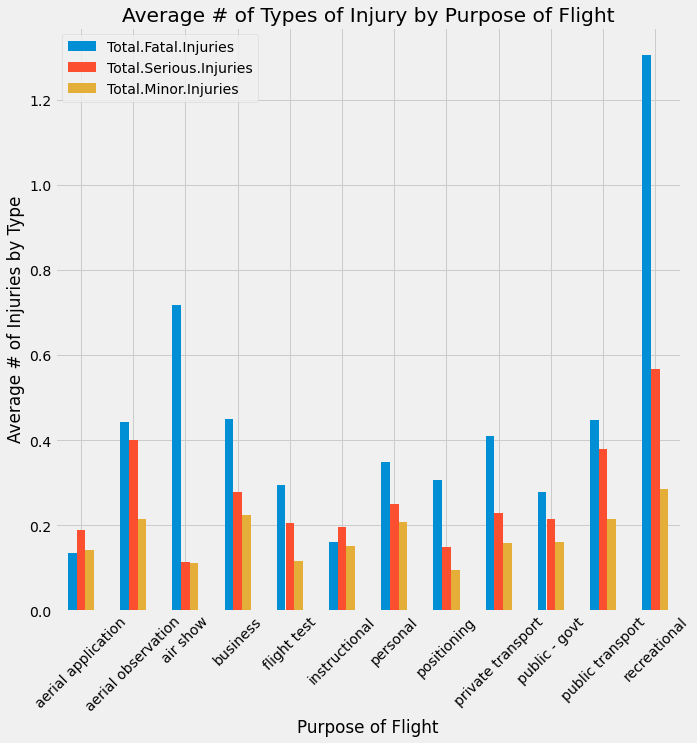

In [127]:
# Repeating the above chart, but without the non-injuries.
injury_df = df.groupby('Purpose.Binned').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'])

#Dropping unknown from the 'purpose_binned' column of injury_df
injury_df.drop('unknown').plot(kind='bar', figsize=(10, 10))
plt.title('Average # of Types of Injury by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Average # of Injuries by Type');

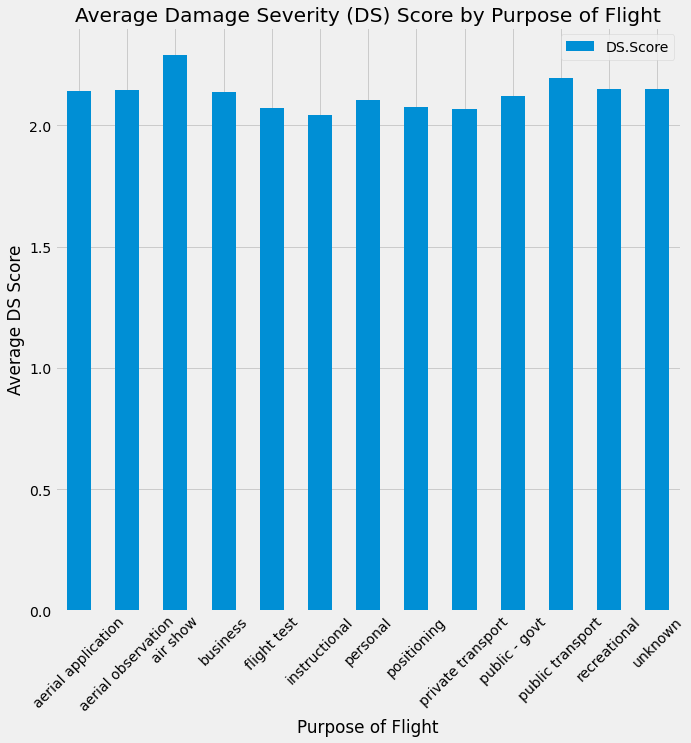

In [128]:

#make DS.Score column all integers
DS_df = df[['Make', 'Purpose.Binned', 'DS.Score']].copy()

# drop rows with 'unknown' in the 'DS.Score' column
DS_df = DS_df[DS_df['DS.Score'] != 'unknown'].dropna()

# convert 'DS.Score' column to integers
DS_df['DS.Score'] = DS_df['DS.Score'].astype(int)

DS_df.groupby('Purpose.Binned').mean().filter(['DS.Score']).plot(kind='bar', figsize=(10, 10))
plt.title('Average Damage Severity (DS) Score by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Average DS Score');

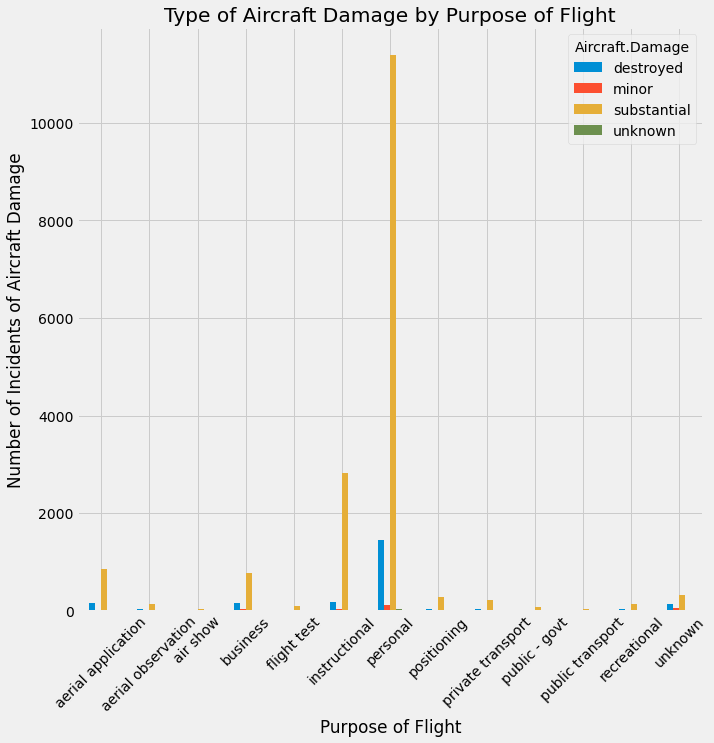

In [129]:
# Create a plot that shows the frequency of the different types of results in Aircraft.Damage, with Purpose.Binned on the x-axis

df.groupby(['Purpose.Binned', 'Aircraft.Damage']).size().unstack().plot(kind='bar', figsize=(10, 10))
plt.title('Type of Aircraft Damage by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Incidents of Aircraft Damage');



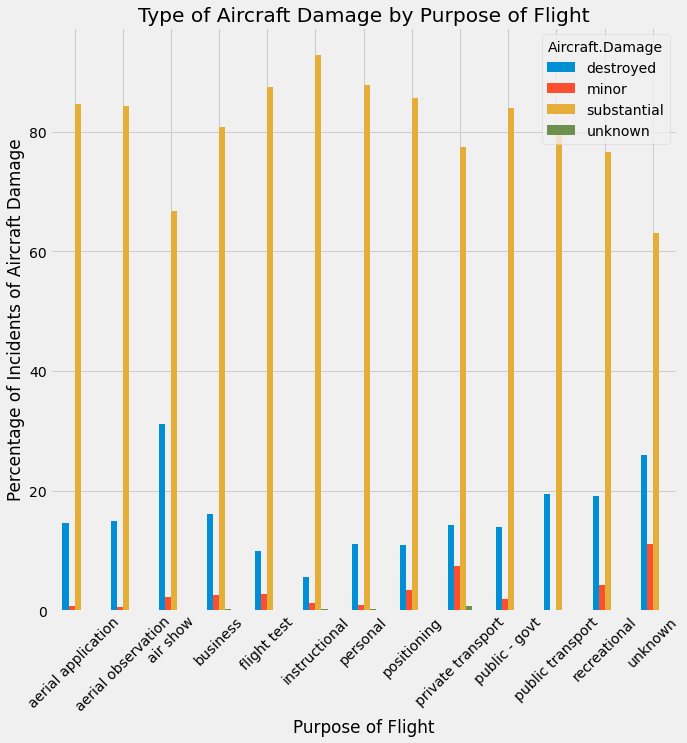

In [130]:
df.groupby(['Purpose.Binned', 'Aircraft.Damage']).size().unstack().apply(lambda x: x/x.sum() * 100, axis=1).plot(kind='bar', figsize=(10, 10))
plt.title('Type of Aircraft Damage by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Percentage of Incidents of Aircraft Damage');

# Makes of Planes

In [131]:
# Making a new df that only accepts the top 25 makes:
top_25 = df['Make'].value_counts().head(25).index.tolist()
top_25_df = df[df['Make'].isin(top_25)].copy()
top_25_df['Make'].value_counts()

cessna                       7712
piper                        4357
beech                        1520
boeing                        446
mooney                        437
airtractor                    414
grumman                       409
cirrus                        328
bellanca                      279
aeronca                       226
maule                         225
champion                      164
dehavilland                   164
luscombe                      162
stinson                       145
north american                113
taylorcraft                   109
aero commander                 94
embraer                        85
airbus                         79
aviat aircraft inc             76
diamond aircraft ind inc       73
aviat                          68
ercoupe                        66
raytheon aircraft company      61
Name: Make, dtype: int64

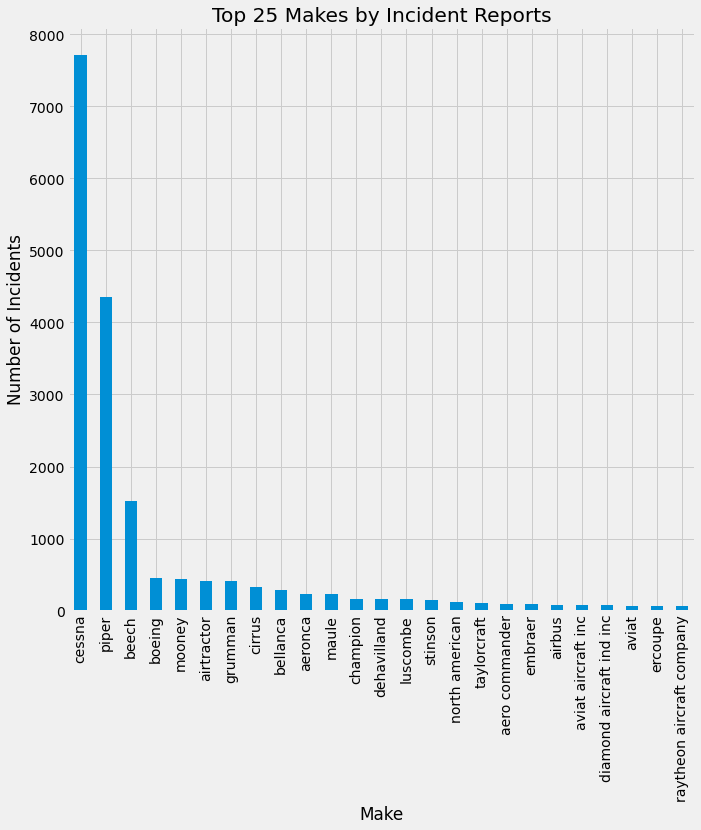

In [132]:
# make a chart of the top 25 makes
top_25_df['Make'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.title('Top 25 Makes by Incident Reports')

plt.xlabel('Make')
plt.ylabel('Number of Incidents');

In [133]:
# and for the top 10 makes:
top_10 = df['Make'].value_counts().head(10).index.tolist()
top_10_df = df[df['Make'].isin(top_10)].copy()
top_10_df['Make'].value_counts()


cessna        7712
piper         4357
beech         1520
boeing         446
mooney         437
airtractor     414
grumman        409
cirrus         328
bellanca       279
aeronca        226
Name: Make, dtype: int64

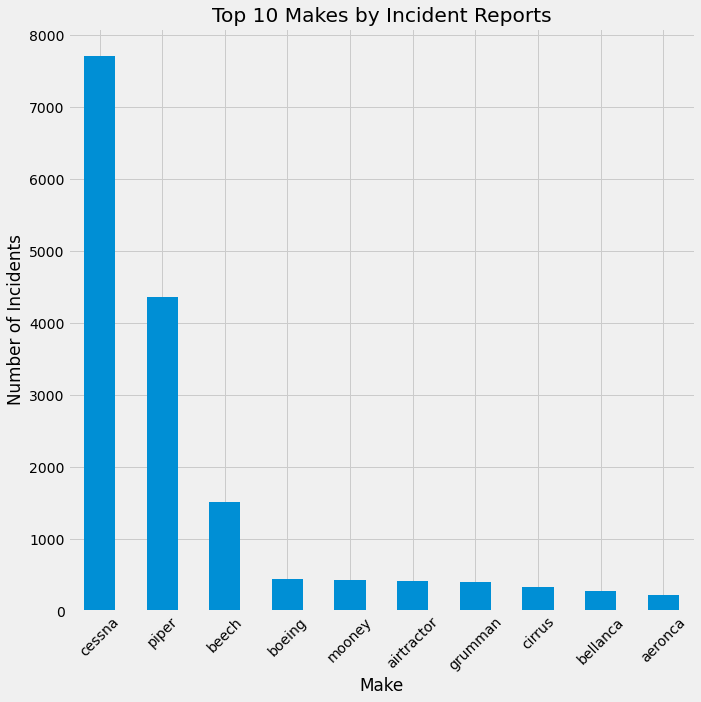

In [134]:
# and the chart for the frequencies of the top 10

top_10_df['Make'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.title('Top 10 Makes by Incident Reports')
plt.xlabel('Make')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45);

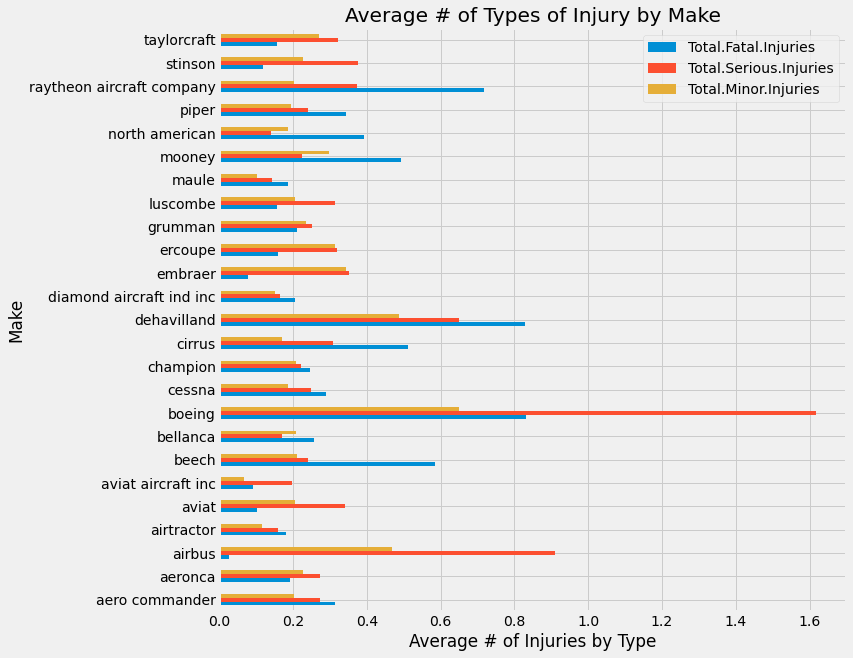

In [135]:
top_25_df.groupby('Make').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']).plot(kind='barh', figsize=(10, 10))
plt.title('Average # of Types of Injury by Make')
plt.xlabel('Average # of Injuries by Type')
plt.ylabel('Make');

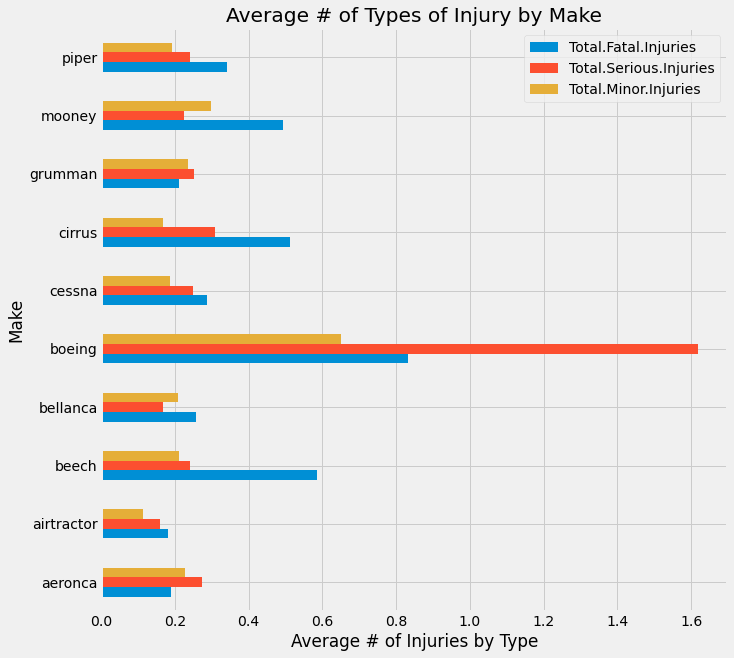

In [136]:
top_10_df.groupby('Make').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']).plot(kind='barh', figsize=(10, 10))
plt.title('Average # of Types of Injury by Make')
plt.xlabel('Average # of Injuries by Type')
plt.ylabel('Make');

<ipython-input-137-e673ad4258cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_makes_df_2['DS.Score'] = top_makes_df_2['DS.Score'].dropna().astype(int)


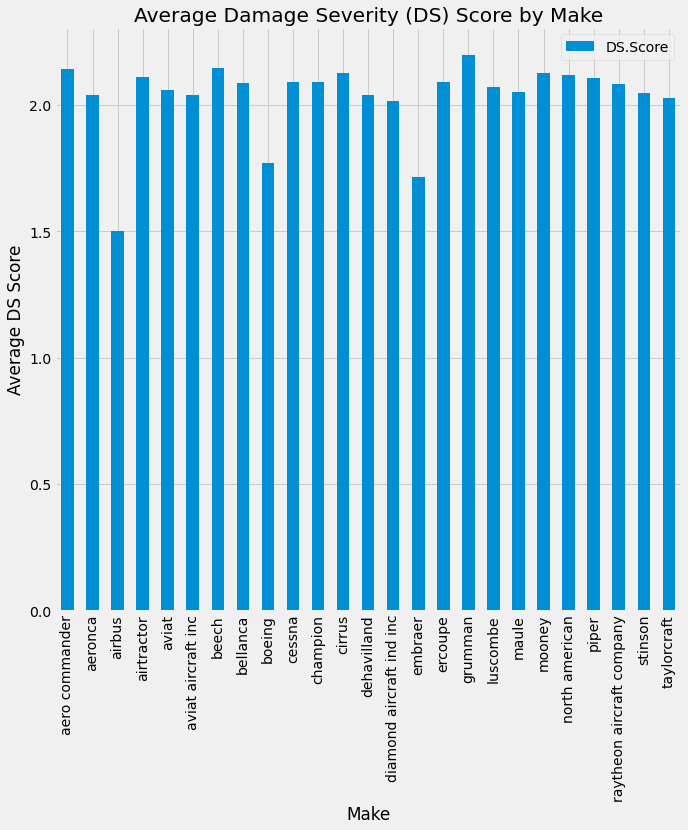

In [137]:
# drop rows with 'unknown' in the 'DS.Score' column
top_makes_df_2 = top_25_df[top_25_df['DS.Score'] != 'unknown']

# convert 'DS.Score' column to integers
top_makes_df_2['DS.Score'] = top_makes_df_2['DS.Score'].dropna().astype(int)

top_makes_df_2.groupby('Make').mean().filter(['DS.Score']).plot(kind='bar', figsize=(10, 10))
plt.title('Average Damage Severity (DS) Score by Make')
plt.xlabel('Make')
plt.ylabel('Average DS Score');


Is there a way to group by size of aircraft produced?
Market cap?

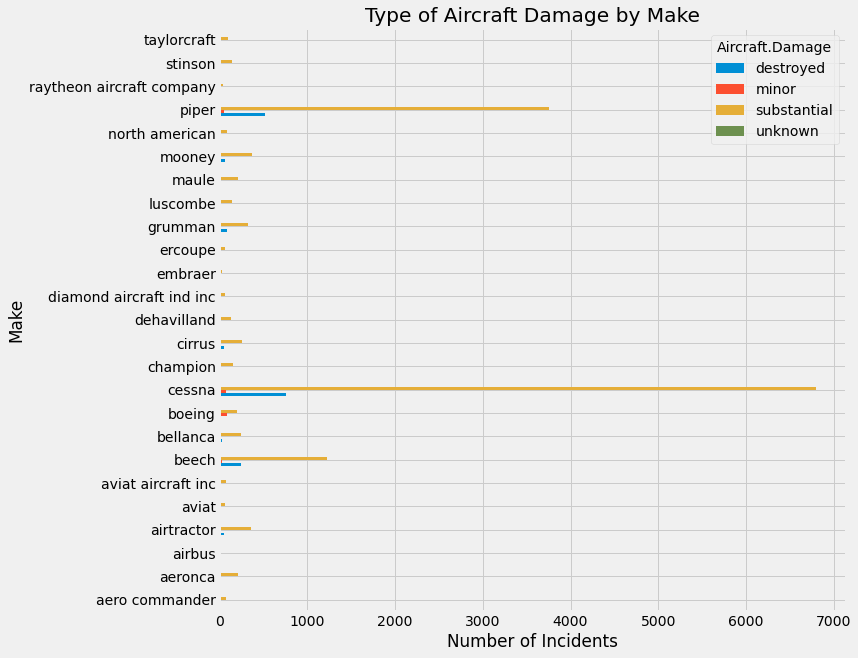

In [138]:

top_25_df.groupby(['Make', 'Aircraft.Damage']).size().unstack().plot(kind='barh', figsize=(10, 10))
plt.title('Type of Aircraft Damage by Make')

plt.xlabel('Number of Incidents')
plt.ylabel('Make');


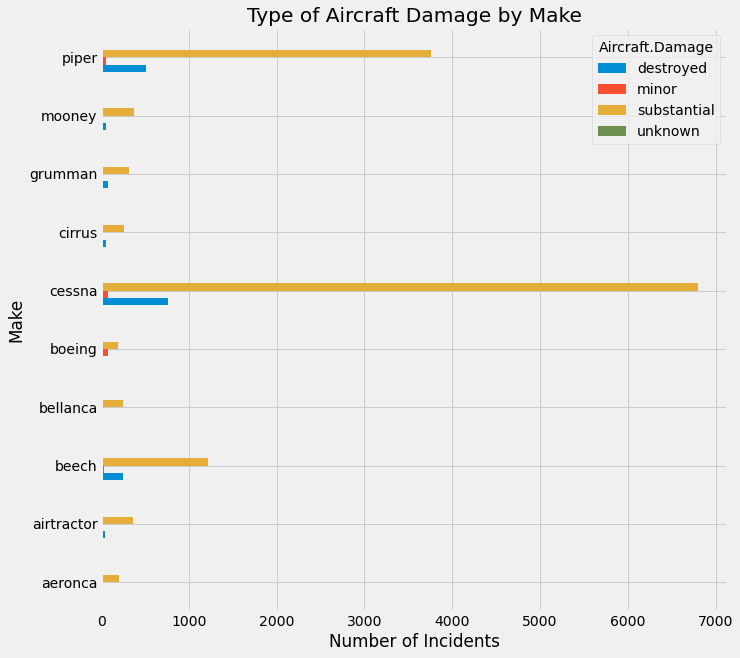

In [139]:

top_10_df.groupby(['Make', 'Aircraft.Damage']).size().unstack().plot(kind='barh', figsize=(10, 10))
plt.title('Type of Aircraft Damage by Make')

plt.xlabel('Number of Incidents')
plt.ylabel('Make');


<ipython-input-140-1fc32009668c>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x/100) for x in ax.get_xticks()])


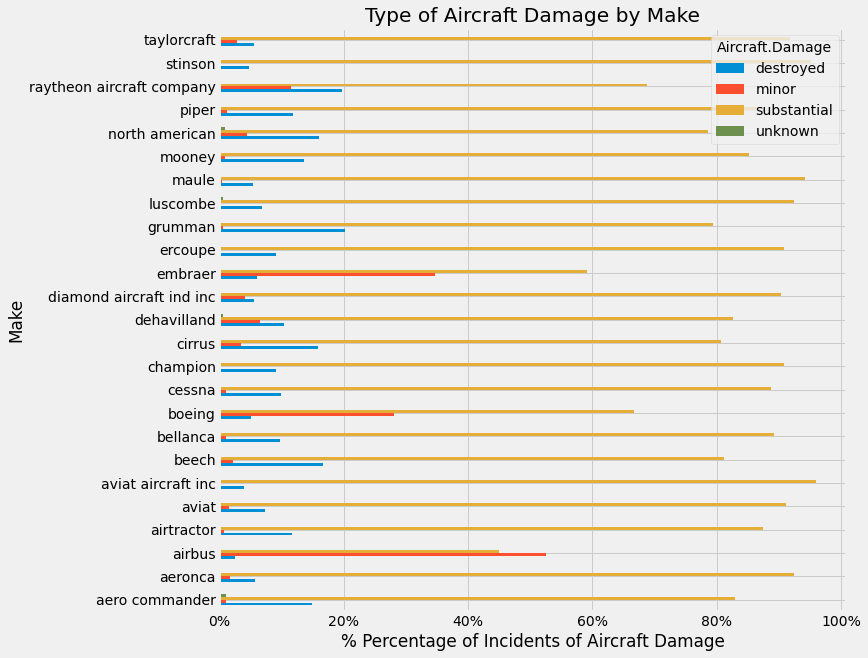

In [140]:
ax = top_25_df.groupby(['Make', 'Aircraft.Damage']).size().unstack().apply(lambda x: x/x.sum() * 100, axis=1).plot(kind='barh', figsize=(10, 10))
ax.set_xticklabels(['{:,.0%}'.format(x/100) for x in ax.get_xticks()])
plt.title('Type of Aircraft Damage by Make')
plt.xlabel('% Percentage of Incidents of Aircraft Damage')
plt.ylabel('Make');


<ipython-input-141-224630fde5cb>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x/100) for x in ax.get_xticks()])


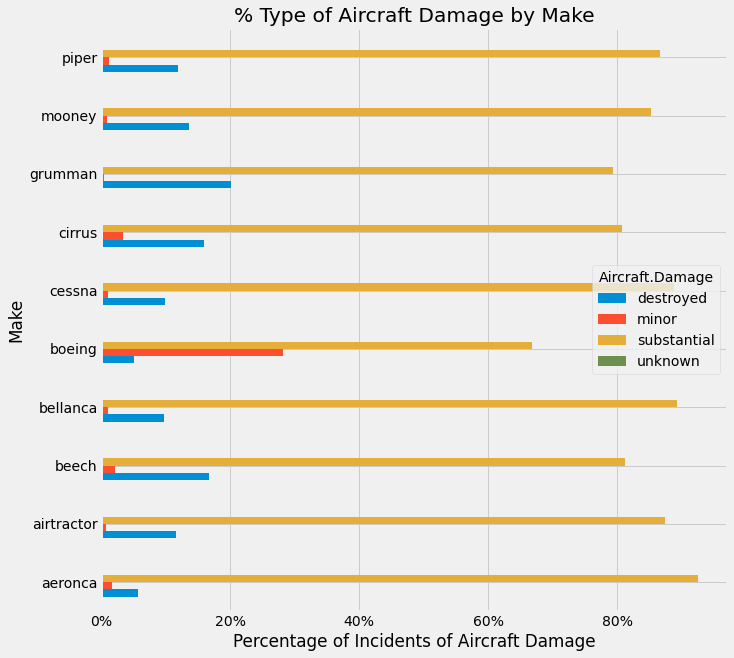

In [141]:
ax = top_10_df.groupby(['Make', 'Aircraft.Damage']).size().unstack().apply(lambda x: x/x.sum() * 100, axis=1).plot(kind='barh', figsize=(10, 10))
ax.set_xticklabels(['{:,.0%}'.format(x/100) for x in ax.get_xticks()])
plt.title('% Type of Aircraft Damage by Make')
plt.xlabel('Percentage of Incidents of Aircraft Damage')
plt.ylabel('Make');


# Longitudinal

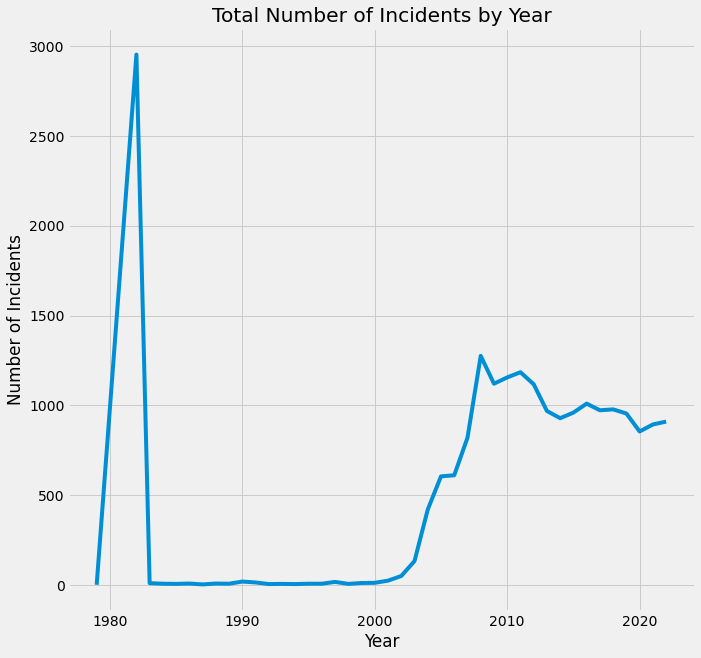

In [142]:
# Plot of total number of incidents by year

df['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 10))
plt.title('Total Number of Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents');

In [143]:

df['Investigation.Type'].value_counts().sort_index()


accident    20519
incident      546
Name: Investigation.Type, dtype: int64

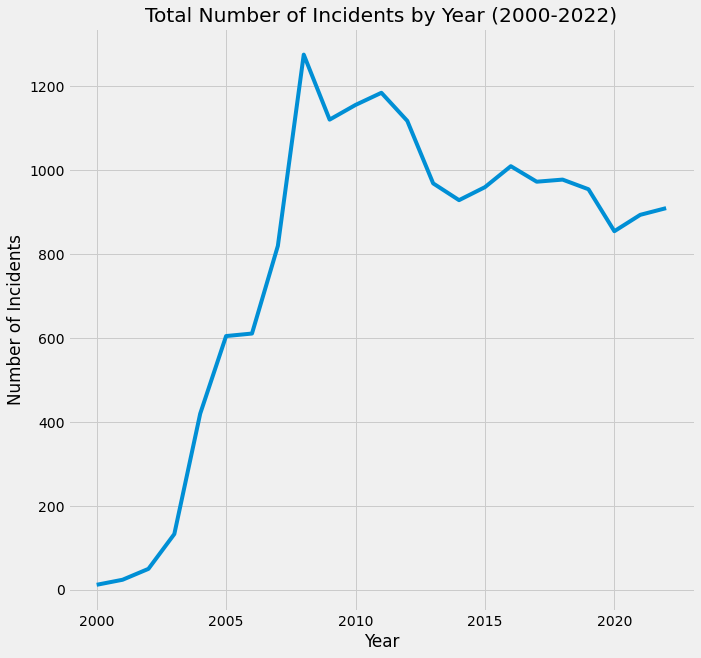

In [144]:
# df of the incidents after the year 2000
df_2000 = df[df['Year'] >= 2000].copy()

df_2000['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 10))
plt.title('Total Number of Incidents by Year (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents');

<AxesSubplot:>

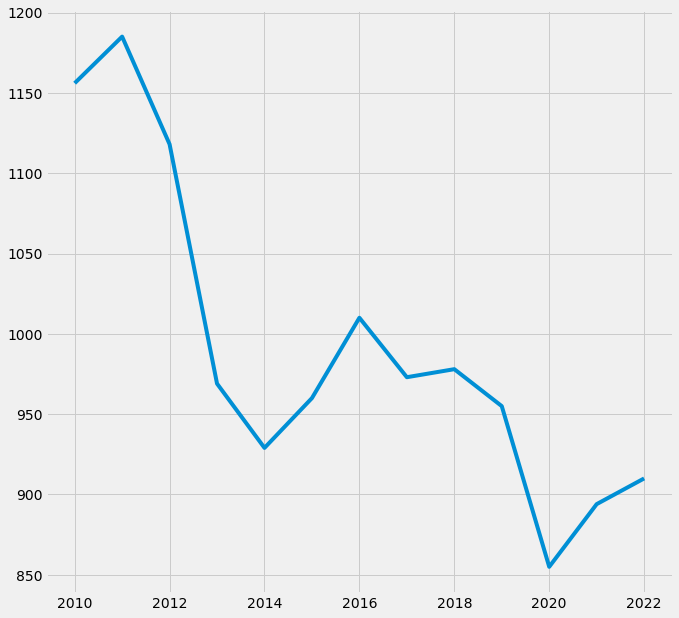

In [145]:
df_2010 = df[df['Year'] >= 2010].copy()
df_2010['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 10))

In [146]:
df['Investigation.Type'].value_counts()

accident    20519
incident      546
Name: Investigation.Type, dtype: int64

# Weather

<ipython-input-147-4c4d22f0af17>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x/100) for x in ax.get_xticks()])


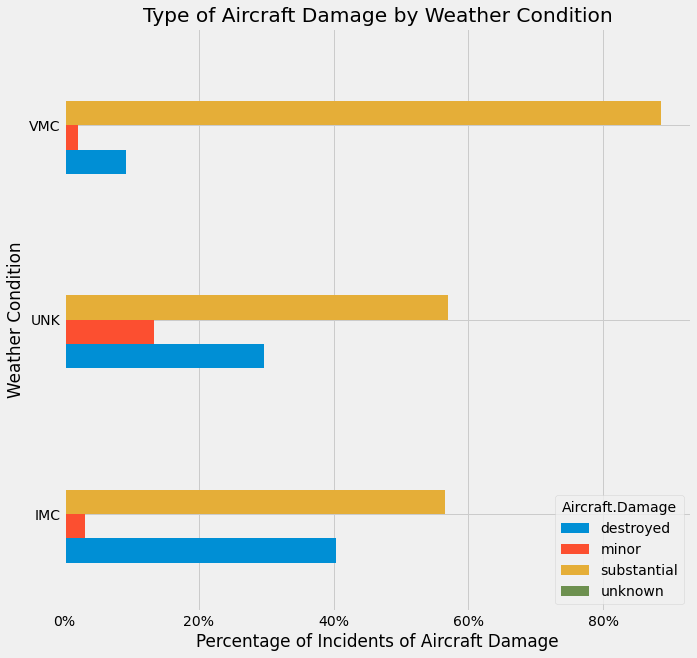

In [147]:
ax = df.groupby(['Weather.Condition', 'Aircraft.Damage']).size().unstack().apply(lambda x: x/x.sum() * 100, axis=1).plot(kind='barh', figsize=(10, 10))
ax.set_xticklabels(['{:,.0%}'.format(x/100) for x in ax.get_xticks()])
plt.title('Type of Aircraft Damage by Weather Condition')
plt.xlabel('Percentage of Incidents of Aircraft Damage')
plt.ylabel('Weather Condition');


In [148]:
df.groupby('Weather.Condition').count()

,Event.ID,Investigation.Type,Accident.Number,Event.Date,Year,Location,State.Code,State.Name,Region,Latitude,...,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.Flight,Purpose.Binned,Air.Carrier,Broad.Phase.of.Flight,Report.Status,Publication.Date
Weather.Condition,,,,,,,,,,,,,,,,,,,,,
IMC,1252,1252,1252,1252,1252,1252,1252,1252,1252,934,...,1226,1162,1252,237,1084,1084,559,424,1142,1252
UNK,162,162,162,162,162,162,162,162,162,108,...,152,143,162,62,110,110,78,55,147,161
VMC,19242,19242,19242,19242,19242,19242,19242,19242,19242,16464,...,18840,18023,19242,1524,18372,18372,7952,5286,17814,19122


# Just looking at agricultures and business and instructional


In [153]:
df_agriculture_instructional = df[(df['Purpose.Binned'] == 'aerial application') | (df['Purpose.Binned'] == 'instructional') | (df['Purpose.Binned'] == 'business')].copy()

top_10_ai = df_agriculture_instructional['Make'].value_counts().head(10).index.tolist()
top_10_agri_instr_df = df_agriculture_instructional[df['Make'].isin(top_10)].copy()
top_10_agri_instr_df['Make'].value_counts()


<ipython-input-153-cf5e81c52cb2>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_10_agri_instr_df = df_agriculture_instructional[df['Make'].isin(top_10)].copy()


cessna        2017
piper         1007
airtractor     359
beech          263
grumman        224
cirrus          72
bellanca        48
mooney          44
aeronca         40
boeing          15
Name: Make, dtype: int64

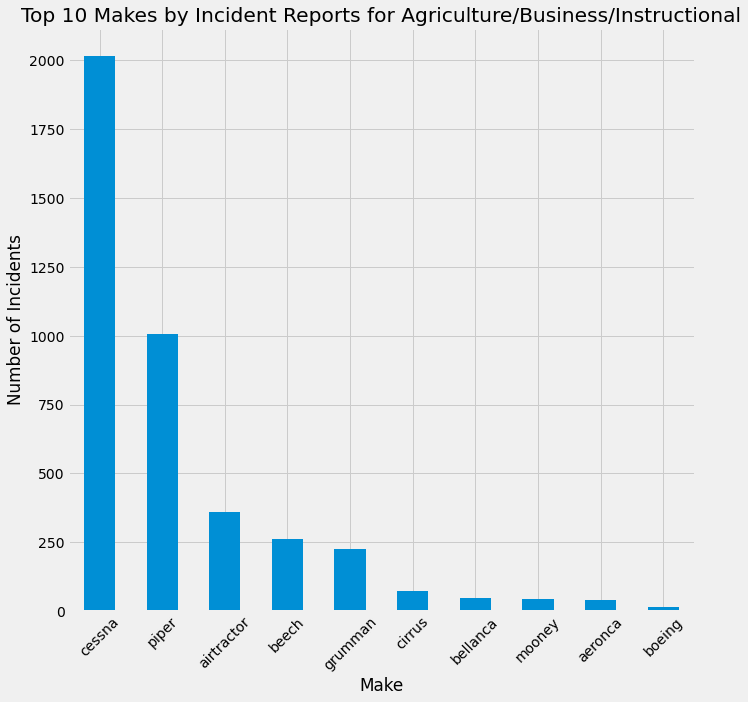

In [155]:
top_10_agri_instr_df['Make'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.title('Top 10 Makes by Incident Reports for Agriculture/Business/Instructional')
plt.xlabel('Make')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45);

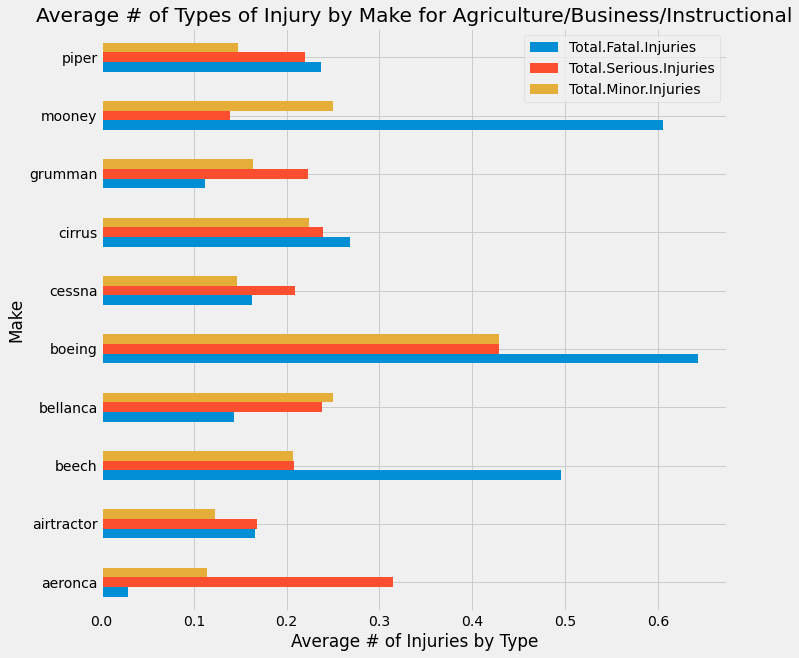

In [156]:
top_10_agri_instr_df.groupby('Make').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']).plot(kind='barh', figsize=(10, 10))
plt.title('Average # of Types of Injury by Make for Agriculture/Business/Instructional')
plt.xlabel('Average # of Injuries by Type')
plt.ylabel('Make');

<ipython-input-158-6caa9e245df0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_makes_abi['DS.Score'] = top_makes_abi['DS.Score'].dropna().astype(int)


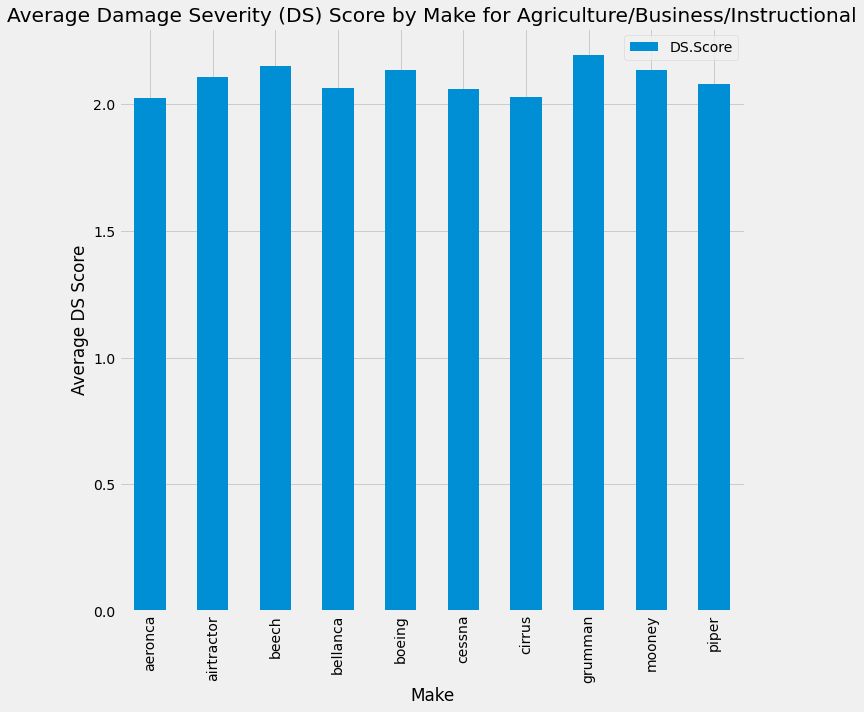

In [158]:
# drop rows with 'unknown' in the 'DS.Score' column
top_makes_abi = top_10_agri_instr_df[top_10_agri_instr_df['DS.Score'] != 'unknown']

# convert 'DS.Score' column to integers
top_makes_abi['DS.Score'] = top_makes_abi['DS.Score'].dropna().astype(int)

top_makes_abi.groupby('Make').mean().filter(['DS.Score']).plot(kind='bar', figsize=(10, 10))
plt.title('Average Damage Severity (DS) Score by Make for Agriculture/Business/Instructional')
plt.xlabel('Make')
plt.ylabel('Average DS Score');

<ipython-input-160-50afd2a1021c>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x/100) for x in ax.get_xticks()])


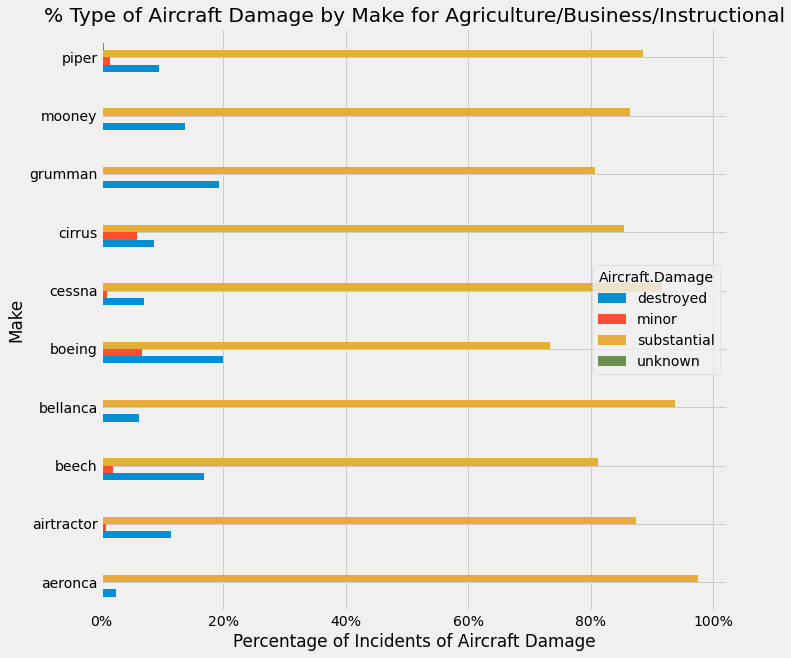

In [160]:
ax = top_10_agri_instr_df.groupby(['Make', 'Aircraft.Damage']).size().unstack().apply(lambda x: x/x.sum() * 100, axis=1).plot(kind='barh', figsize=(10, 10))
ax.set_xticklabels(['{:,.0%}'.format(x/100) for x in ax.get_xticks()])
plt.title('% Type of Aircraft Damage by Make for Agriculture/Business/Instructional')
plt.xlabel('Percentage of Incidents of Aircraft Damage')
plt.ylabel('Make');